<a href="https://colab.research.google.com/github/samuelrubert/pucrio-mvp-deeplearning/blob/dev/Meu_classificador_de_imagens_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificador de imagens CIFAR-10

## Definição

O objetivo deste projeto é criar e treinar um modelo convolucional capaz de classificar as imagens de um conjunto de dados, aplicando técnicas vistas no curso.

O projeto usará o conjunto de imagens CIFAR-10.

Esse conjunto é formado por 60000 imagens RGB de tamanho 32x32, divididas igualmente entre 10 categorias de animais e objetos. O conjunto ainda é dividido entre 50000 imagens de treino e 10000 imagens de teste. Os rótulos de saída são vetores com um numeral entre 0 e 9 que representa a classe da imagem.

Informações:

https://www.cs.toronto.edu/~kriz/cifar.html

Referência:

Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.

https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf

## Bibliotecas e configurações

Vamos importar a biblioteca tensorflow para criação, treino e uso da rede neural, e outras bibliotecas utilitárias.

In [1]:
import tensorflow as tf

import math
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('dark_background')

Definir uma semente para os geradores aleatórios, de forma a produzir resultados consistentes.

In [2]:
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

## Funções

Definir uma função para exibir o gráfico de resultados de cada modelo.

In [3]:
def plotar_historico(history):
    plt.figure(figsize=(5+1*(epocas-1), 4))

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.subplot(1, 2, 1)
    plt.plot(range(1, epocas+1), loss, label='Treino', color='blue')
    plt.plot(range(1, epocas+1), val_loss, label='Validação', color='yellow')
    plt.legend(loc='upper right')
    plt.title('Perda de Treino e Validação')
    plt.ylabel('Loss')
    plt.xlabel('Época')


    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    plt.subplot(1, 2, 2)
    plt.plot(range(1, epocas+1), acc, label='Treino', color='blue')
    plt.plot(range(1, epocas+1), val_acc, label='Validação', color='yellow')
    plt.legend(loc='lower right')
    plt.title('Acurácia de Treino e Validação')
    plt.ylabel('Acurácia')
    plt.xlabel('Época')

    plt.show()

Função para exibir algumas saídas do modelo

In [4]:
def testar_saidas(modelo, num_imgs):
    saidas = []
    start = 115
    for i in range(start, start+num_imgs):
        # Exibir imagem de entrada
        img = x_test[i]
        plt.figure(figsize=(1, 1))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        # Ativar o classificador
        input = np.array([img]) # Batch com 1 elemento
        out = modelo.predict(input, verbose=0)

        # Exibir categoria de saída
        cat = categorias[np.argmax(out)]
        prob = np.round(np.max(out) * 100, 1)
        print(f"Saída escolhida: {cat} -- {prob}%")

        # Exibir segunda opção
        out2 = out
        out2[0][np.argmax(out)] = 0
        cat2 = categorias[np.argmax(out2)]
        prob2 = np.round(np.max(out2) * 100, 1)
        print(f"Segunda opção: {cat2} -- {prob2}%")
        print()

## Preparação do dataset

Carga do conjunto de dados

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


Converter os valores de entrada para a faixa [0,1], que é a faixa esperada pelas bibliotecas para dados do tipo _float_.

In [6]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

Obter o número de classes, que será usado na criação do modelo.

In [7]:
num_classes = len(np.unique(y_train))
print(num_classes)

10


Criar uma lista de categorias, para traduzir os resultados numéricos da rede neural em texto compreensível.

O índice da lista corresponde ao número da categoria no conjunto de dados.

In [8]:
categorias = [
    "Avião",
    "Carro",
    "Ave",
    "Gato",
    "Cervo",
    "Cão",
    "Sapo",
    "Cavalo",
    "Barco",
    "Caminhão"
]

Visualizar um elemento e sua categoria.

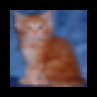

3 - Gato


In [9]:
i = 91
img = x_train[i]

plt.figure(figsize=(1, 1))
plt.imshow(img)
plt.axis('off')
plt.show()

print(y_train[i][0], '-', categorias[y_train[i][0]])

# Modelo 1

## Modelagem

Vamos começar com um modelo de 4 camadas:

- Duas camadas convolucionais com stride=2 para redução das dimensões. Utilizam a função de ativação ReLU, que é de computação simples e um ponto de partida comum em redes convolucionais.
- Uma camada de achatamento.
- Uma saída densa com ativação softmax para obter um vetor de probabilidades de categorias.

Este modelo foi capaz de classificar o dataset MNIST com acurácia de >98%, por isso será nosso ponto de partida.

In [ ]:
class Classificador(tf.keras.Model):

  def __init__(self):
    super().__init__()

    # Camadas
    self.mylayers = [
        tf.keras.layers.Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'), # 16x16
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding='same', activation='relu'), # 8x8
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=num_classes, activation='softmax')
    ]

  def call(self, input):
    out = input
    for mylayer in self.mylayers:
        out = mylayer(out)
    return out

classificador = Classificador()

Um teste para verificar se o modelo foi criado corretamente.

In [ ]:
input = x_train[:1] # Batch com 1 elemento

output = classificador.predict(input)

print(output)

1/1 [==============================] - 2s 2s/step
[[0.1140788  0.09589719 0.10017095 0.10453084 0.10593447 0.08870903
  0.10050742 0.10309764 0.10365091 0.08342276]]


## Treinamento

Vamos configurar o modelo para treino, utilizando o algoritmo de otimização Adam.

Vamos usar também a função de perda *SparseCategoricalCrossentropy*, que é capaz de calcular o erro entre um valor numérico (a categoria de cada imagem) e o vetor de probabilidades emitido pelo modelo.

Por fim, configurar o treinamento para medir a acurácia do modelo.

In [ ]:
classificador.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

Executar 12 épocas de treinamento.

Durante o treinamento, 10% do conjunto de treino será separado para a validação.

In [ ]:
epocas = 12

history = classificador.fit(x_train, y_train, epochs=epocas, shuffle=True, validation_split=0.1)

Epoch 1/12
1407/1407 [==============================] - 8s 4ms/step - loss: 1.5442 - accuracy: 0.4510 - val_loss: 1.3385 - val_accuracy: 0.5222
Epoch 2/12
1407/1407 [==============================] - 6s 4ms/step - loss: 1.2325 - accuracy: 0.5663 - val_loss: 1.1717 - val_accuracy: 0.5894
Epoch 3/12
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1012 - accuracy: 0.6127 - val_loss: 1.0947 - val_accuracy: 0.6104
Epoch 4/12
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0131 - accuracy: 0.6450 - val_loss: 1.0719 - val_accuracy: 0.6234
Epoch 5/12
1407/1407 [==============================] - 5s 3ms/step - loss: 0.9438 - accuracy: 0.6708 - val_loss: 1.0307 - val_accuracy: 0.6444
Epoch 6/12
1407/1407 [==============================] - 5s 4ms/step - loss: 0.8919 - accuracy: 0.6880 - val_loss: 1.0369 - val_accuracy: 0.6410
Epoch 7/12
1407/1407 [==============================] - 5s 3ms/step - loss: 0.8452 - accuracy: 0.7060 - val_loss: 1.0159 - val_accuracy:

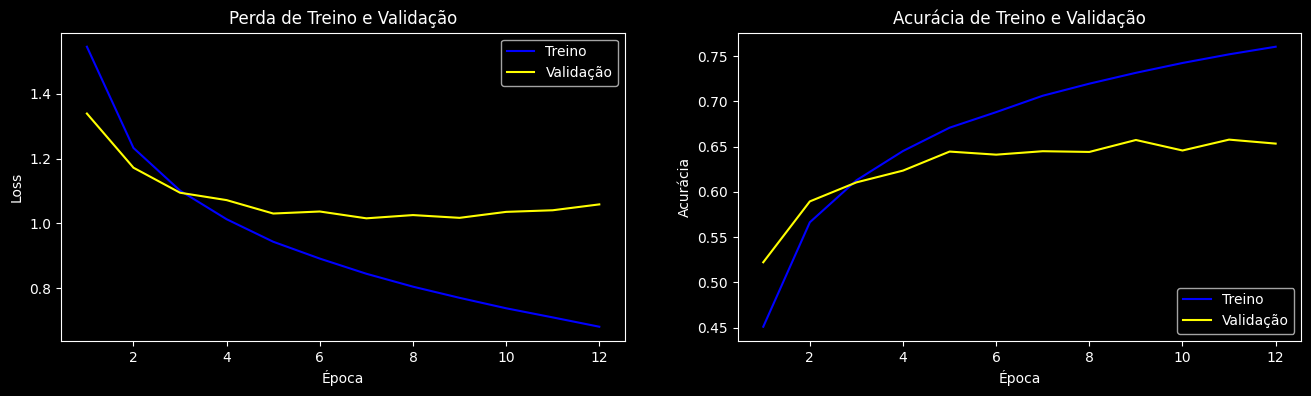

In [ ]:
plotar_historico(history)

## Avaliação

O primeiro modelo consegue avançar no aprendizado, mas parece estabilizar numa acurácia em torno de 65%. Percebe-se desde a época 3 um distanciamento entre o desempenho de treino e o de validação, indicativo de _overfitting_.

# Modelo 2: dropout

## Modelagem

Uma estratégia comum para reduzir o _overfitting_ em redes convolucionais é empregar a técnica de regularização _dropout_.

O _dropout_ "desliga" alguns neurônios aleatoriamente durante o treinamento, o que tende a aumentar a capacidade de generalização do modelo. É aplicado somente durante o treinamento.

Verifiquei que é comum empregar o _dropout_ antes das camadas densas do modelo, com taxa entre 0.3 e 0.5. Vamos aplicar essa estratégia.

In [ ]:
class Classificador2(tf.keras.Model):

  def __init__(self):
    super().__init__()

    # Camadas
    self.mylayers = [
        tf.keras.layers.Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'), # 16x16
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding='same', activation='relu'), # 8x8
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(units=num_classes, activation='softmax')
    ]

  def call(self, input):
    out = input
    for mylayer in self.mylayers:
        out = mylayer(out)
    return out

classificador2 = Classificador2()

## Treinamento

In [ ]:
classificador2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
epocas = 12

history2 = classificador2.fit(x_train, y_train, epochs=epocas, shuffle=True, validation_split=0.1)

Epoch 1/12
1407/1407 [==============================] - 8s 4ms/step - loss: 1.5882 - accuracy: 0.4323 - val_loss: 1.3567 - val_accuracy: 0.5186
Epoch 2/12
1407/1407 [==============================] - 5s 4ms/step - loss: 1.3203 - accuracy: 0.5333 - val_loss: 1.2210 - val_accuracy: 0.5744
Epoch 3/12
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2248 - accuracy: 0.5654 - val_loss: 1.1482 - val_accuracy: 0.5996
Epoch 4/12
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1447 - accuracy: 0.5951 - val_loss: 1.0724 - val_accuracy: 0.6250
Epoch 5/12
1407/1407 [==============================] - 6s 4ms/step - loss: 1.0873 - accuracy: 0.6158 - val_loss: 1.0413 - val_accuracy: 0.6406
Epoch 6/12
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0380 - accuracy: 0.6362 - val_loss: 1.0263 - val_accuracy: 0.6478
Epoch 7/12
1407/1407 [==============================] - 6s 4ms/step - loss: 1.0000 - accuracy: 0.6508 - val_loss: 0.9678 - val_accuracy:

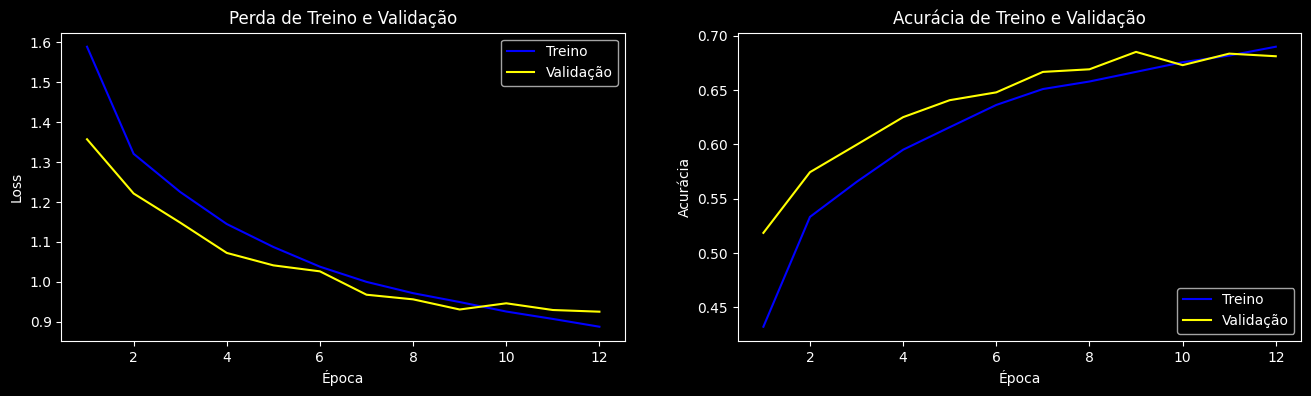

In [ ]:
plotar_historico(history2)

## Avaliação

A aplicação do _dropout_ parece ter tido o resultado esperado, reduzindo consideravelmente a distância entre o desempenho de treino e o de validação.

A acurácia do modelo aumentou, ficando em torno de 68%.

# Modelo 3: complexidade

## Modelagem

No intuito de aumentar a acurácia do modelo, vamos atribuir mais complexidade a ele na forma de novas camadas convolucionais e densas.

In [ ]:
class Classificador3(tf.keras.Model):

  def __init__(self):
    super().__init__()

    # Camadas
    self.mylayers = [
        tf.keras.layers.Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'), # 16x16
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding='same', activation='relu'), # 8x8
        tf.keras.layers.Conv2D(128, kernel_size=3, strides=2, padding='same', activation='relu'), # 4x4
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(units=num_classes, activation='softmax')
    ]

  def call(self, input):
    out = input
    for mylayer in self.mylayers:
        out = mylayer(out)
    return out

classificador3 = Classificador3()

## Treinamento

In [ ]:
classificador3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
epocas = 12

history3 = classificador3.fit(x_train, y_train, epochs=epocas, shuffle=True, validation_split=0.1)

Epoch 1/12
1407/1407 [==============================] - 9s 5ms/step - loss: 1.5522 - accuracy: 0.4312 - val_loss: 1.2733 - val_accuracy: 0.5380
Epoch 2/12
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2260 - accuracy: 0.5612 - val_loss: 1.0607 - val_accuracy: 0.6280
Epoch 3/12
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0674 - accuracy: 0.6177 - val_loss: 1.0106 - val_accuracy: 0.6420
Epoch 4/12
1407/1407 [==============================] - 6s 4ms/step - loss: 0.9534 - accuracy: 0.6599 - val_loss: 0.9708 - val_accuracy: 0.6594
Epoch 5/12
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8582 - accuracy: 0.6969 - val_loss: 0.8978 - val_accuracy: 0.6800
Epoch 6/12
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7733 - accuracy: 0.7247 - val_loss: 0.8907 - val_accuracy: 0.6916
Epoch 7/12
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7007 - accuracy: 0.7512 - val_loss: 0.8817 - val_accuracy:

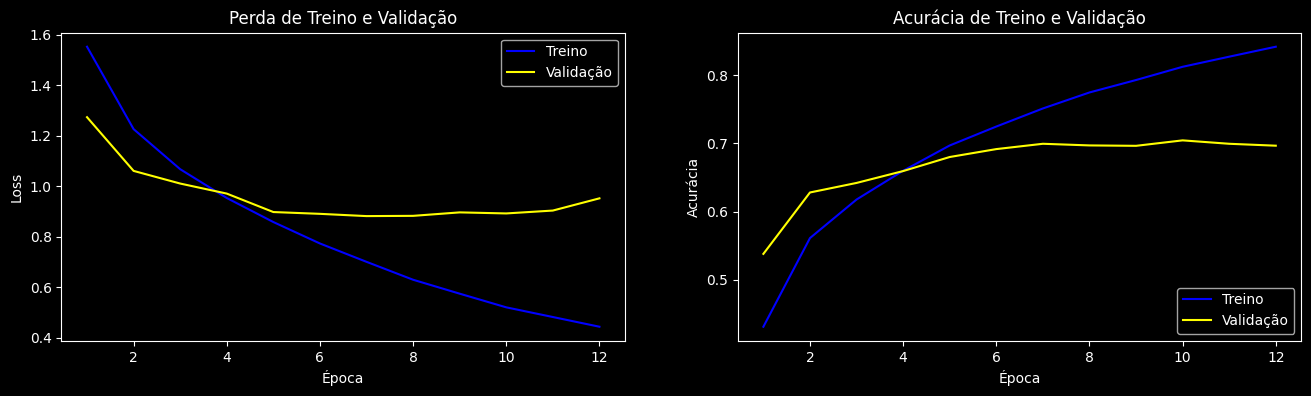

In [ ]:
plotar_historico(history3)

## Avaliação

Nesta etapa percebemos que houve redução da perda e aumento da acurácia do modelo para quase 70%. No entanto, observamos novamente um grande distanciamento entre o desempenho de treino e de validação.

# Modelo 4.1: mais dropout

Na fase 4, serão criados diferentes modelos com base no modelo 3, comparando a efetividade de diferentes técnicas na redução do _overfitting_.

## Modelagem

Nesta versão, aplicaremos mais duas camadas de _dropout_ junto às camadas densas do modelo.

In [ ]:
class Classificador4_1(tf.keras.Model):

  def __init__(self):
    super().__init__()

    # Camadas
    self.mylayers = [
        tf.keras.layers.Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'), # 16x16
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding='same', activation='relu'), # 8x8
        tf.keras.layers.Conv2D(128, kernel_size=3, strides=2, padding='same', activation='relu'), # 4x4
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(units=num_classes, activation='softmax')
    ]

  def call(self, input):
    out = input
    for mylayer in self.mylayers:
        out = mylayer(out)
    return out

classificador4_1 = Classificador4_1()

## Treinamento

In [ ]:
classificador4_1.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

Com o aumento da complexidade, o aprendizado dos modelos tem ficado mais lento. Vamos aumentar o número de épocas de treino para 15.

In [ ]:
epocas = 15

history4_1 = classificador4_1.fit(x_train, y_train, epochs=epocas, shuffle=True, validation_split=0.1)

Epoch 1/15
1407/1407 [==============================] - 10s 5ms/step - loss: 1.6975 - accuracy: 0.3776 - val_loss: 1.3728 - val_accuracy: 0.4986
Epoch 2/15
1407/1407 [==============================] - 7s 5ms/step - loss: 1.3898 - accuracy: 0.5024 - val_loss: 1.1729 - val_accuracy: 0.5680
Epoch 3/15
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2545 - accuracy: 0.5512 - val_loss: 1.1205 - val_accuracy: 0.5980
Epoch 4/15
1407/1407 [==============================] - 7s 5ms/step - loss: 1.1613 - accuracy: 0.5883 - val_loss: 1.0599 - val_accuracy: 0.6232
Epoch 5/15
1407/1407 [==============================] - 6s 5ms/step - loss: 1.0805 - accuracy: 0.6199 - val_loss: 1.0014 - val_accuracy: 0.6488
Epoch 6/15
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0234 - accuracy: 0.6383 - val_loss: 0.9887 - val_accuracy: 0.6550
Epoch 7/15
1407/1407 [==============================] - 6s 5ms/step - loss: 0.9732 - accuracy: 0.6580 - val_loss: 0.9201 - val_accuracy

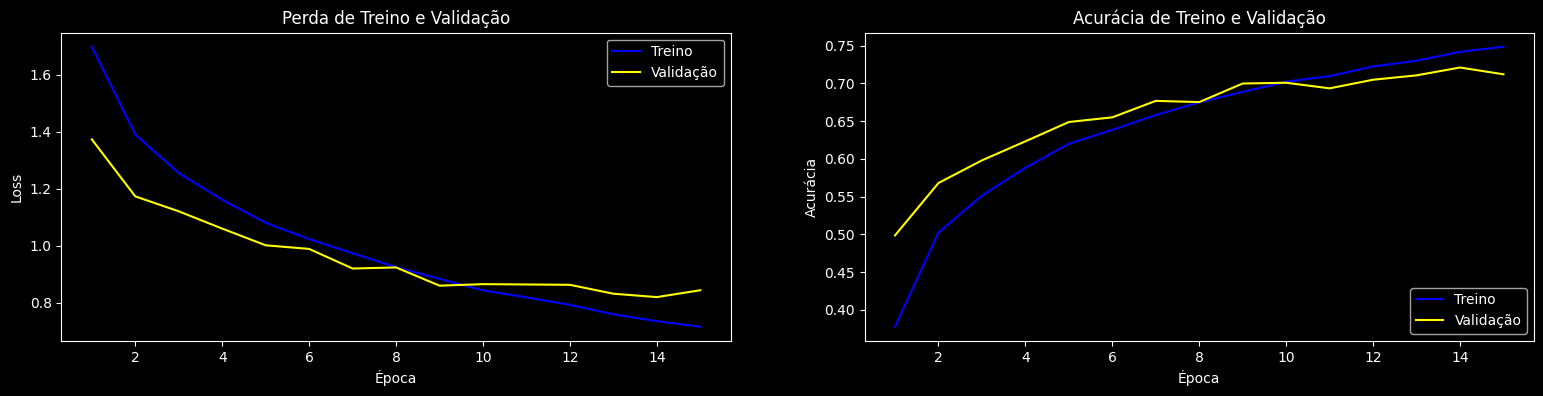

In [ ]:
plotar_historico(history4_1)

## Avaliação

O modelo manteve a acurácia e reduziu a perda, enquanto aproximou novamente os resultados de treino e validação. Porém ainda se observa distanciamento entre eles a partir da época 10.

# Modelo 4.2: mais dropout

## Modelagem

Esta versão também aplicará mais duas camadas de _dropout_, porém numa configuração diferente, com uma delas entre camadas convolucionais, o que é menos usual.

In [ ]:
class Classificador4_2(tf.keras.Model):

  def __init__(self):
    super().__init__()

    # Camadas
    self.mylayers = [
        tf.keras.layers.Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'), # 16x16
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding='same', activation='relu'), # 8x8
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(128, kernel_size=3, strides=2, padding='same', activation='relu'), # 4x4
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(units=num_classes, activation='softmax')
    ]

  def call(self, input):
    out = input
    for mylayer in self.mylayers:
        out = mylayer(out)
    return out

classificador4_2 = Classificador4_2()

## Treinamento

In [ ]:
classificador4_2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
epocas = 15

history4_2 = classificador4_2.fit(x_train, y_train, epochs=epocas, shuffle=True, validation_split=0.1)

Epoch 1/15
1407/1407 [==============================] - 10s 6ms/step - loss: 1.6593 - accuracy: 0.3886 - val_loss: 1.3701 - val_accuracy: 0.4992
Epoch 2/15
1407/1407 [==============================] - 7s 5ms/step - loss: 1.3632 - accuracy: 0.5069 - val_loss: 1.2276 - val_accuracy: 0.5578
Epoch 3/15
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2568 - accuracy: 0.5487 - val_loss: 1.1462 - val_accuracy: 0.5890
Epoch 4/15
1407/1407 [==============================] - 8s 6ms/step - loss: 1.1784 - accuracy: 0.5772 - val_loss: 1.0797 - val_accuracy: 0.6186
Epoch 5/15
1407/1407 [==============================] - 6s 5ms/step - loss: 1.1239 - accuracy: 0.5993 - val_loss: 1.0624 - val_accuracy: 0.6244
Epoch 6/15
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0768 - accuracy: 0.6143 - val_loss: 0.9757 - val_accuracy: 0.6490
Epoch 7/15
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0350 - accuracy: 0.6312 - val_loss: 0.9488 - val_accuracy

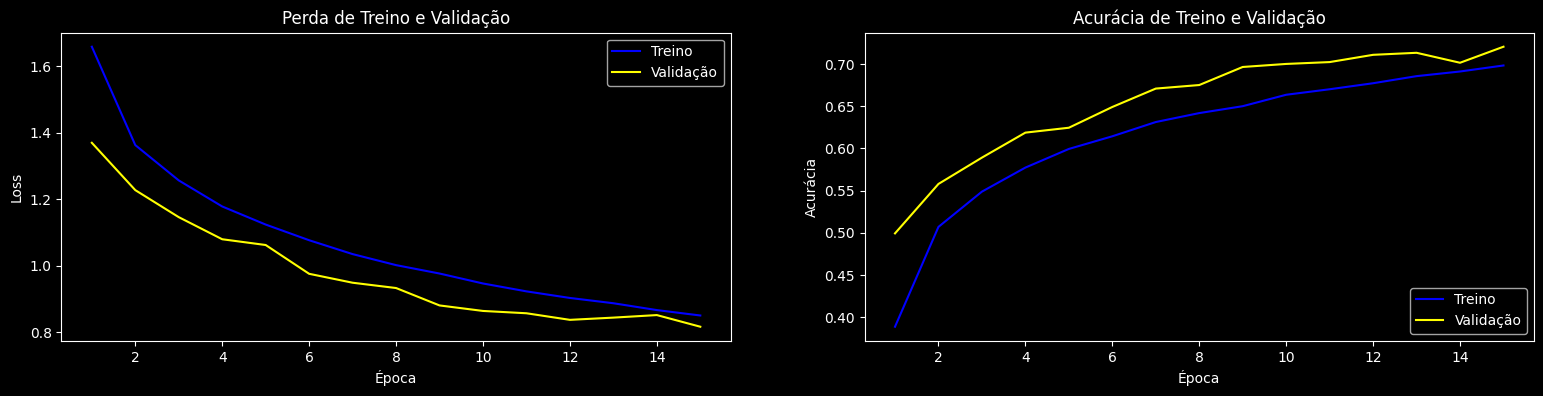

In [ ]:
plotar_historico(history4_2)

## Avaliação

Esta segunda configuração de _dropout_ teve melhor desempenho que a anterior, atingindo perda menor e acurácia maior, com os resultados de validação superiores aos de treino.

# Modelo 4.3: batch norm

## Modelagem

Nesta versão, aplicaremos a técnica de normalização em lote (_batch normalization_), que pode melhorar o desempenho do modelo e combater o _overfitting_.

Serão duas camadas de normalização após as duas primeiras camadas convolucionais.

In [ ]:
class Classificador4_3(tf.keras.Model):

  def __init__(self):
    super().__init__()

    # Camadas
    self.mylayers = [
        tf.keras.layers.Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'), # 16x16
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding='same', activation='relu'), # 8x8
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, kernel_size=3, strides=2, padding='same', activation='relu'), # 4x4
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(units=num_classes, activation='softmax')
    ]

  def call(self, input):
    out = input
    for mylayer in self.mylayers:
        out = mylayer(out)
    return out

classificador4_3 = Classificador4_3()

## Treinamento

In [ ]:
classificador4_3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
epocas = 15

history4_3 = classificador4_3.fit(x_train, y_train, epochs=epocas, shuffle=True, validation_split=0.1)

Epoch 1/15
1407/1407 [==============================] - 10s 5ms/step - loss: 1.4860 - accuracy: 0.4574 - val_loss: 1.2616 - val_accuracy: 0.5448
Epoch 2/15
1407/1407 [==============================] - 7s 5ms/step - loss: 1.1718 - accuracy: 0.5818 - val_loss: 1.1225 - val_accuracy: 0.5962
Epoch 3/15
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0041 - accuracy: 0.6428 - val_loss: 0.9347 - val_accuracy: 0.6706
Epoch 4/15
1407/1407 [==============================] - 8s 5ms/step - loss: 0.8856 - accuracy: 0.6859 - val_loss: 0.9124 - val_accuracy: 0.6826
Epoch 5/15
1407/1407 [==============================] - 8s 6ms/step - loss: 0.7932 - accuracy: 0.7218 - val_loss: 1.0203 - val_accuracy: 0.6386
Epoch 6/15
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7227 - accuracy: 0.7450 - val_loss: 0.8493 - val_accuracy: 0.7108
Epoch 7/15
1407/1407 [==============================] - 8s 5ms/step - loss: 0.6504 - accuracy: 0.7712 - val_loss: 0.9064 - val_accuracy

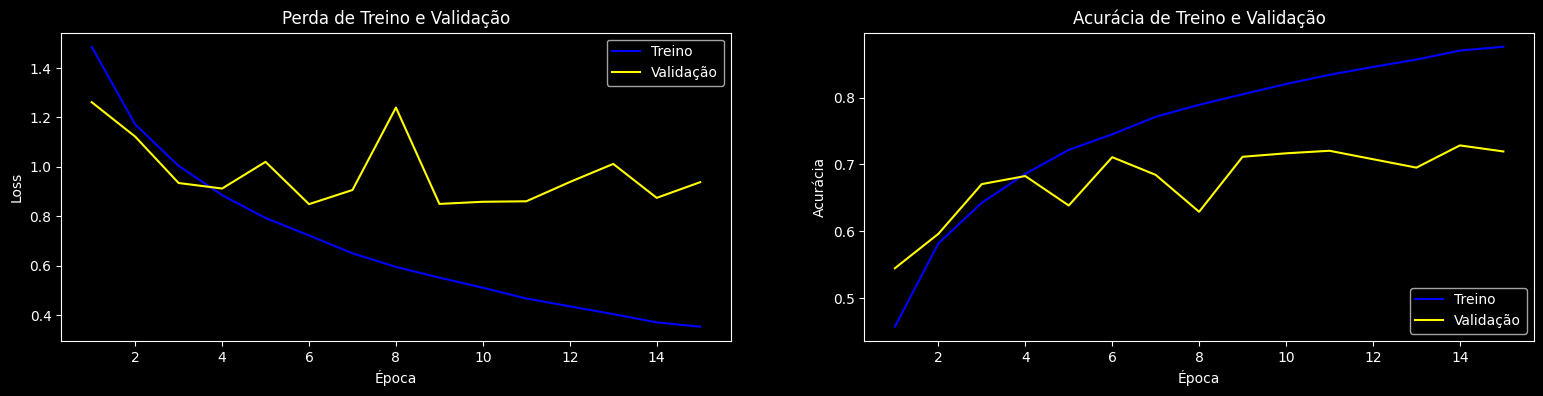

In [ ]:
plotar_historico(history4_3)

## Avaliação

Esta versão com a normalização em lote não mostrou resultados satisfatórios, exibindo grandes oscilações durante o treinamento sem apresentar melhorias nos resultados.

# Modelo 4.4: data augmentation

## Modelagem

Aqui, aplicaremos a técnica de _data augmentation_, que consiste em aplicar pequenas transformações nos dados de entrada a cada iteração.

Isso efetivamente simula novos dados de entrada, o que tende a aumentar a capacidade de generalização do modelo, reduzindo o _overfitting_.

Aplicaremos três transformações:

1.   Aleatoriamente inverter a imagem na horizontal;
2.   Aleatoriamente girar a imagem em até 0.1*pi em algum sentido;
3.   Aleatoriamente ampliar ou reduzir a imagem em até 10%.

In [ ]:
class Classificador4_4(tf.keras.Model):

  def __init__(self):
    super().__init__()

    # Camadas
    self.mylayers = [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1),
        tf.keras.layers.Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'), # 16x16
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding='same', activation='relu'), # 8x8
        tf.keras.layers.Conv2D(128, kernel_size=3, strides=2, padding='same', activation='relu'), # 4x4
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(units=num_classes, activation='softmax')
    ]

  def call(self, input):
    out = input
    for mylayer in self.mylayers:
        out = mylayer(out)
    return out

classificador4_4 = Classificador4_4()

## Treinamento

In [ ]:
classificador4_4.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
epocas = 15

history4_4 = classificador4_4.fit(x_train, y_train, epochs=epocas, shuffle=True, validation_split=0.1)

Epoch 1/15
1407/1407 [==============================] - 12s 7ms/step - loss: 1.7004 - accuracy: 0.3817 - val_loss: 1.4198 - val_accuracy: 0.4846
Epoch 2/15
1407/1407 [==============================] - 14s 10ms/step - loss: 1.4423 - accuracy: 0.4792 - val_loss: 1.2158 - val_accuracy: 0.5596
Epoch 3/15
1407/1407 [==============================] - 9s 6ms/step - loss: 1.3401 - accuracy: 0.5176 - val_loss: 1.2216 - val_accuracy: 0.5632
Epoch 4/15
1407/1407 [==============================] - 8s 6ms/step - loss: 1.2736 - accuracy: 0.5459 - val_loss: 1.1718 - val_accuracy: 0.5880
Epoch 5/15
1407/1407 [==============================] - 9s 6ms/step - loss: 1.2220 - accuracy: 0.5651 - val_loss: 1.1235 - val_accuracy: 0.6004
Epoch 6/15
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1794 - accuracy: 0.5798 - val_loss: 1.0552 - val_accuracy: 0.6292
Epoch 7/15
1407/1407 [==============================] - 8s 6ms/step - loss: 1.1458 - accuracy: 0.5896 - val_loss: 1.0043 - val_accura

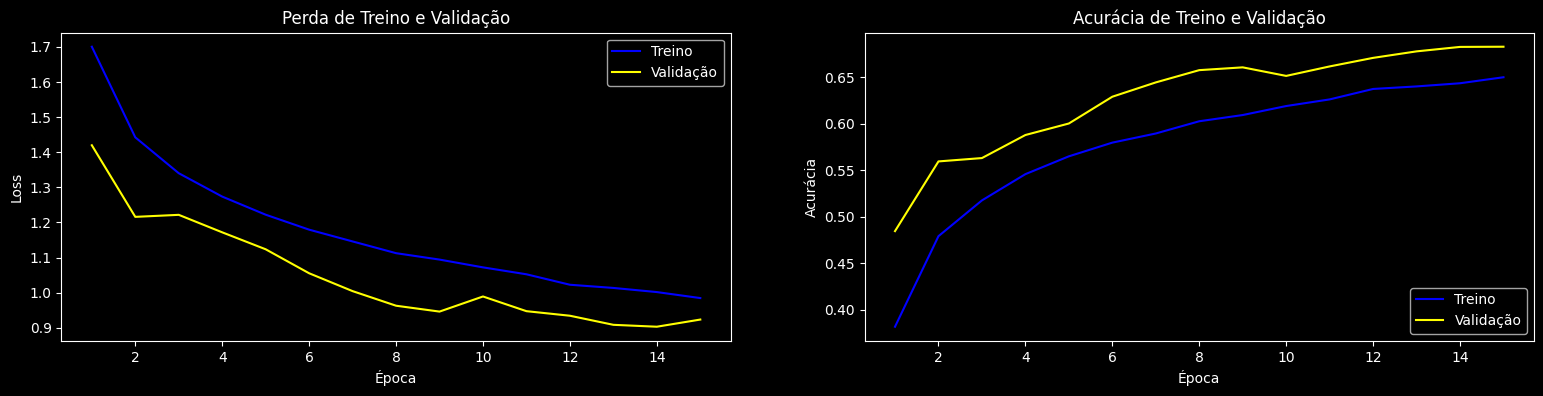

In [ ]:
plotar_historico(history4_4)

## Avaliação

O modelo com _data augmentation_ teve bons resultados na redução do _overfitting_, fazendo com que a curva de validação acompanhasse a de treino. No entanto, a acurácia do modelo sofreu uma pequena piora com relação ao modelo 3.

# Modelo 5.1: drop + pool

Na fase 5, iremos alterar o _stride_ das camadas convolucionais de 2 para 1, e introduzir camadas _MaxPool_ para realizar a redução das dimensões anteriormente feita pelas camadas de convolução. Em tese, isso permitirá às camadas convolucionais um maior aprendizado sobre as características das imagens. Faremos isso utilizando como base os melhores modelos da fase 4.

## Modelagem

O primeiro modelo base será o 4.2, que aplicou mais camadas de _dropout_ e teve o melhor desempenho na fase 4.

In [ ]:
class Classificador5_1(tf.keras.Model):

  def __init__(self):
    super().__init__()

    # Camadas
    self.mylayers = [
        tf.keras.layers.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(), # 16x16
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(), # 8x8
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(), # 4x4
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(units=num_classes, activation='softmax')
    ]

  def call(self, input):
    out = input
    for mylayer in self.mylayers:
        out = mylayer(out)
    return out

classificador5_1 = Classificador5_1()

## Treinamento

In [ ]:
classificador5_1.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
epocas = 15

history5_1 = classificador5_1.fit(x_train, y_train, epochs=epocas, shuffle=True, validation_split=0.1)

Epoch 1/15
1407/1407 [==============================] - 10s 5ms/step - loss: 1.5928 - accuracy: 0.4128 - val_loss: 1.2225 - val_accuracy: 0.5560
Epoch 2/15
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2447 - accuracy: 0.5539 - val_loss: 1.0343 - val_accuracy: 0.6372
Epoch 3/15
1407/1407 [==============================] - 7s 5ms/step - loss: 1.1044 - accuracy: 0.6072 - val_loss: 0.9929 - val_accuracy: 0.6484
Epoch 4/15
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0293 - accuracy: 0.6365 - val_loss: 0.9485 - val_accuracy: 0.6672
Epoch 5/15
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9665 - accuracy: 0.6594 - val_loss: 0.8625 - val_accuracy: 0.6988
Epoch 6/15
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9216 - accuracy: 0.6770 - val_loss: 0.7669 - val_accuracy: 0.7414
Epoch 7/15
1407/1407 [==============================] - 8s 5ms/step - loss: 0.8871 - accuracy: 0.6869 - val_loss: 0.7556 - val_accuracy

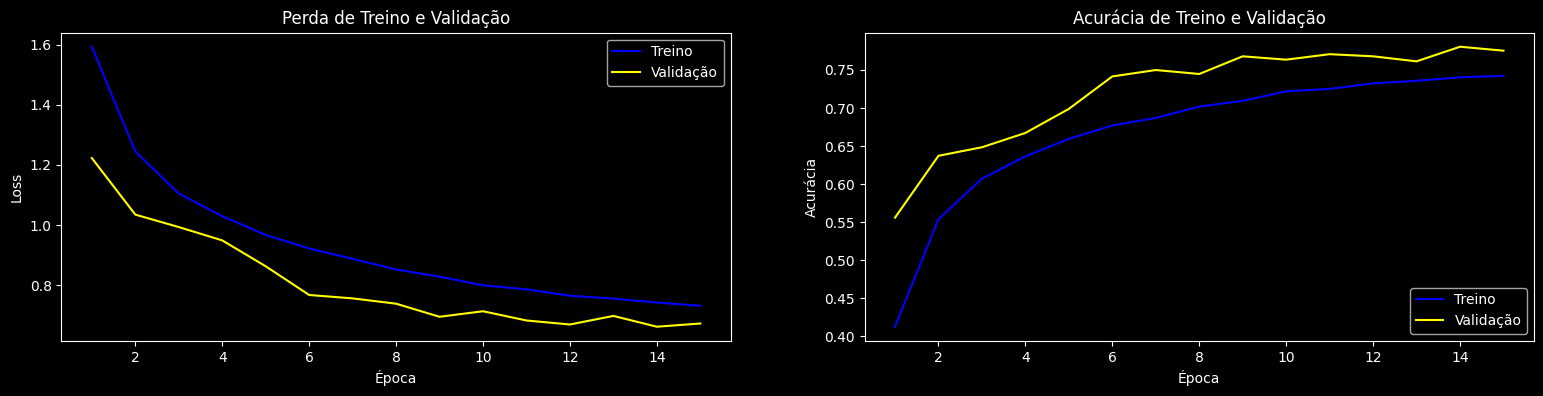

In [ ]:
plotar_historico(history5_1)

## Avaliação

Esta alteração do modelo teve bons resultados, com uma redução da perda e aumento da acurácia de validação para quase 78%.

# Modelo 5.2: aug + pool

## Modelagem

O modelo base desta versão será o 4.4, que aplicou _data augmentation_ e teve um desempenho razoável na fase 4.

In [ ]:
class Classificador5_2(tf.keras.Model):

  def __init__(self):
    super().__init__()

    # Camadas
    self.mylayers = [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1),
        tf.keras.layers.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(), # 16x16
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(), # 8x8
        tf.keras.layers.Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(), # 4x4
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(units=num_classes, activation='softmax')
    ]

  def call(self, input):
    out = input
    for mylayer in self.mylayers:
        out = mylayer(out)
    return out

classificador5_2 = Classificador5_2()

## Treinamento

In [ ]:
classificador5_2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
epocas = 15

history5_2 = classificador5_2.fit(x_train, y_train, epochs=epocas, shuffle=True, validation_split=0.1)

Epoch 1/15
1407/1407 [==============================] - 12s 7ms/step - loss: 1.6415 - accuracy: 0.3993 - val_loss: 1.3616 - val_accuracy: 0.5106
Epoch 2/15
1407/1407 [==============================] - 8s 6ms/step - loss: 1.3511 - accuracy: 0.5160 - val_loss: 1.1473 - val_accuracy: 0.5878
Epoch 3/15
1407/1407 [==============================] - 9s 6ms/step - loss: 1.2372 - accuracy: 0.5569 - val_loss: 1.0499 - val_accuracy: 0.6294
Epoch 4/15
1407/1407 [==============================] - 10s 7ms/step - loss: 1.1648 - accuracy: 0.5854 - val_loss: 1.0685 - val_accuracy: 0.6312
Epoch 5/15
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1090 - accuracy: 0.6108 - val_loss: 0.9655 - val_accuracy: 0.6620
Epoch 6/15
1407/1407 [==============================] - 8s 6ms/step - loss: 1.0633 - accuracy: 0.6239 - val_loss: 0.9331 - val_accuracy: 0.6754
Epoch 7/15
1407/1407 [==============================] - 9s 6ms/step - loss: 1.0314 - accuracy: 0.6356 - val_loss: 0.8965 - val_accurac

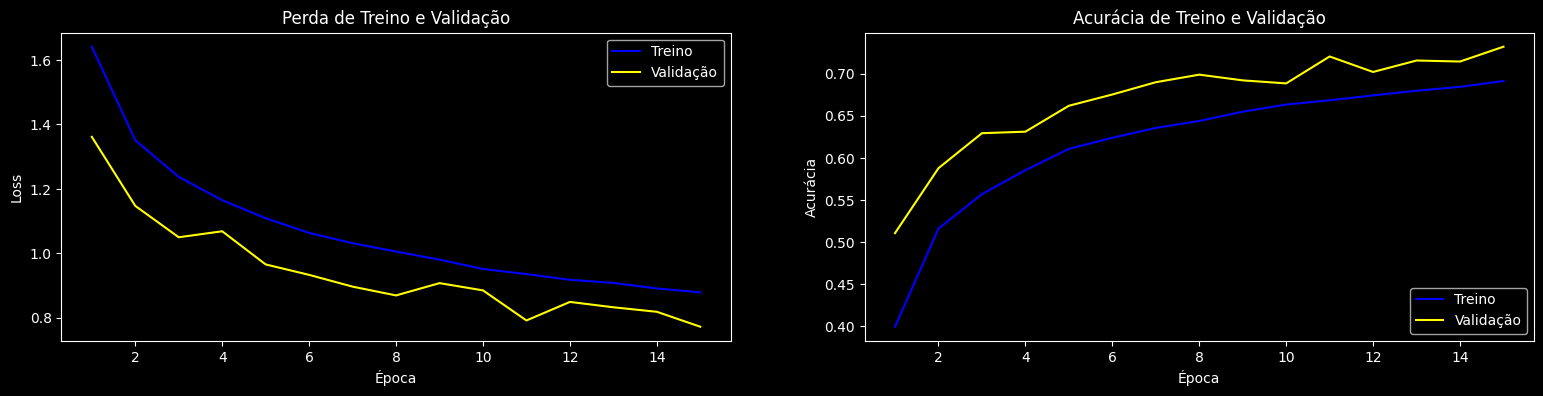

In [ ]:
plotar_historico(history5_2)

## Avaliação

Esta versão também mostrou melhorias com relação ao modelo usado como base, mas, assim como o modelo 4.4 teve desempenho pior que o 4.2, este também foi pior que o 5.1.

# Modelo 5.3: drop + aug + pool

## Modelagem

Aqui, faremos uma junção dos modelos 4.2 e 4.4, unindo as duas técnicas mais bem-sucedidas da fase 4, _dropout_ e _data augmentation_, e então aplicaremos o _pooling_.

In [ ]:
class Classificador5_3(tf.keras.Model):

  def __init__(self):
    super().__init__()

    # Camadas
    self.mylayers = [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1),
        tf.keras.layers.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(), # 16x16
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(), # 8x8
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(), # 4x4
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(units=num_classes, activation='softmax')
    ]

  def call(self, input):
    out = input
    for mylayer in self.mylayers:
        out = mylayer(out)
    return out

classificador = Classificador5_3()

## Treinamento

In [ ]:
classificador.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
epocas = 15

history = classificador.fit(x_train, y_train, epochs=epocas, shuffle=True, validation_split=0.1)

Epoch 1/15
1407/1407 [==============================] - 12s 7ms/step - loss: 1.7270 - accuracy: 0.3648 - val_loss: 1.4356 - val_accuracy: 0.4688
Epoch 2/15
1407/1407 [==============================] - 9s 7ms/step - loss: 1.4754 - accuracy: 0.4644 - val_loss: 1.2261 - val_accuracy: 0.5572
Epoch 3/15
1407/1407 [==============================] - 9s 6ms/step - loss: 1.3797 - accuracy: 0.5027 - val_loss: 1.1745 - val_accuracy: 0.5738
Epoch 4/15
1407/1407 [==============================] - 9s 6ms/step - loss: 1.3152 - accuracy: 0.5254 - val_loss: 1.1878 - val_accuracy: 0.5718
Epoch 5/15
1407/1407 [==============================] - 9s 7ms/step - loss: 1.2759 - accuracy: 0.5437 - val_loss: 1.1067 - val_accuracy: 0.6088
Epoch 6/15
1407/1407 [==============================] - 9s 7ms/step - loss: 1.2442 - accuracy: 0.5555 - val_loss: 0.9944 - val_accuracy: 0.6570
Epoch 7/15
1407/1407 [==============================] - 9s 7ms/step - loss: 1.2177 - accuracy: 0.5651 - val_loss: 1.0089 - val_accuracy

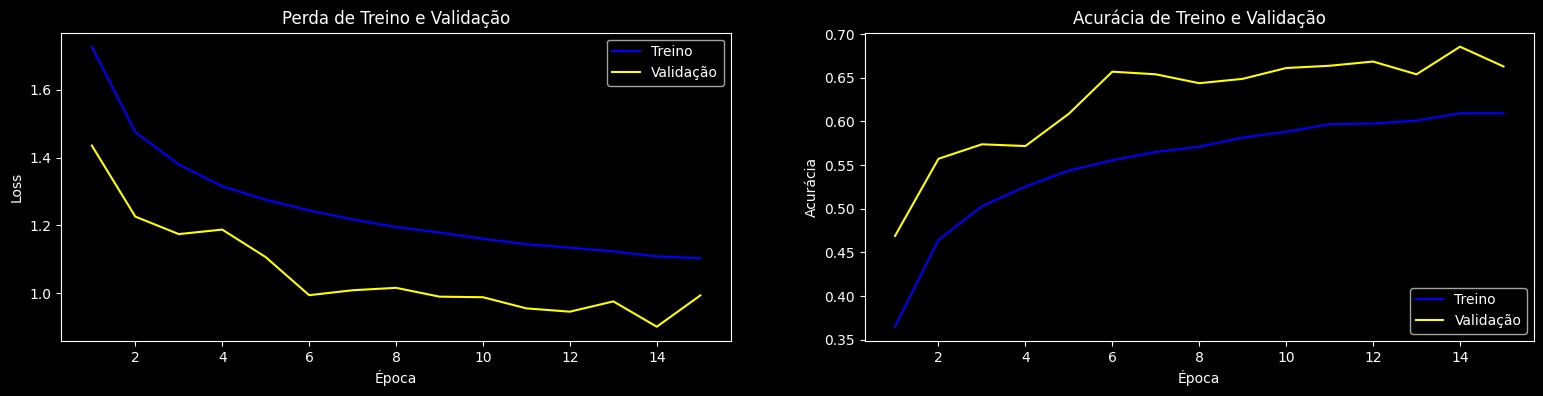

In [ ]:
plotar_historico(history)

## Avaliação

A versão teve um desempenho pobre, tanto se comparada aos modelos base quanto se comparada às outras versões da fase 5. Apresentou perda e acurácia piores e maiores oscilações durante o treino.

# Modelo Final

## Modelagem

Agora, selecionaremos o modelo 5.1, que foi o mais bem-sucedido do projeto. O modelo será treinado com todo o conjunto de dados de treinamento, e a validação será feita com o conjunto de teste separado inicialmente, para enfim avaliar seu desempenho com dados nunca vistos.

In [23]:
class ClassificadorFinal(tf.keras.Model):

  def __init__(self):
    super().__init__()

    # Camadas
    self.mylayers = [
        tf.keras.layers.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(), # 16x16
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(), # 8x8
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(), # 4x4
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(units=num_classes, activation='softmax')
    ]

  def call(self, input):
    out = input
    for mylayer in self.mylayers:
        out = mylayer(out)
    return out

classificador_final = ClassificadorFinal()

## Treinamento

In [24]:
classificador_final.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [25]:
epocas = 15

history_final = classificador_final.fit(x_train, y_train, epochs=epocas, shuffle=True, validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 11s 6ms/step - loss: 1.5804 - accuracy: 0.4160 - val_loss: 1.2414 - val_accuracy: 0.5445
Epoch 2/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2255 - accuracy: 0.5610 - val_loss: 1.0047 - val_accuracy: 0.6553
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0829 - accuracy: 0.6159 - val_loss: 0.9912 - val_accuracy: 0.6592
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0033 - accuracy: 0.6467 - val_loss: 0.8638 - val_accuracy: 0.7003
Epoch 5/15
1563/1563 [==============================] - 9s 5ms/step - loss: 0.9499 - accuracy: 0.6672 - val_loss: 0.8120 - val_accuracy: 0.7261
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9041 - accuracy: 0.6824 - val_loss: 0.8040 - val_accuracy: 0.7265
Epoch 7/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8685 - accuracy: 0.6969 - val_loss: 0.7900 - val_accuracy

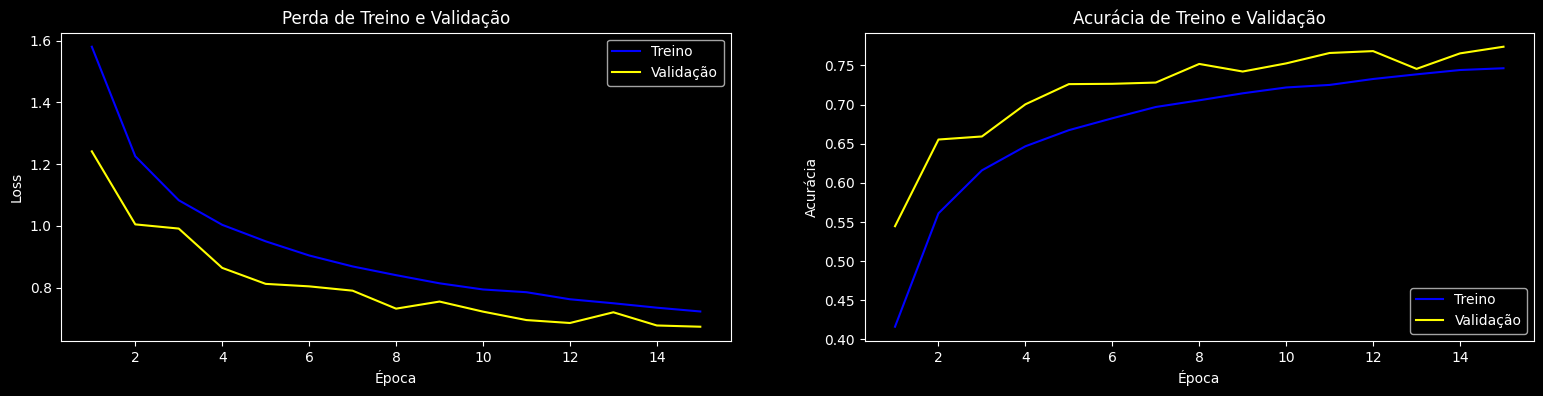

In [26]:
plotar_historico(history_final)

Salvar o modelo final

In [27]:
# # Importar bibliotecas
# from tensorflow.keras.models import load_model

# Salvar o modelo
classificador_final.save('classificador_final.keras')

## Avaliação

Nesta